In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
### Funciones Auxiliares ###

def densidad_plot_comparativo(df, tipos, columna, caracteristica):
    for col in tipos: 
        sns.distplot(df[df[columna] == col][caracteristica].dropna(), hist = False, label = col)
    plt.ylabel('Densidad')
    plt.title(f'Distribucion de {caracteristica} para diferentes tipos de propiedad')

# Distribucion de antiguedad

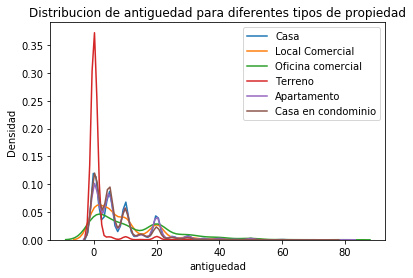

In [4]:
tipos_comunes = ['Casa', 'Local Comercial', 'Oficina comercial', 'Terreno', 'Apartamento', 'Casa en condominio']
densidad_plot_comparativo(df, tipos_comunes, 'tipodepropiedad', 'antiguedad')
plt.savefig('./figs/distribucion_antiguedad_2.png')

### Se observa un pico en terrenos, se procede a graficar sin el para comparar mejor a los demas

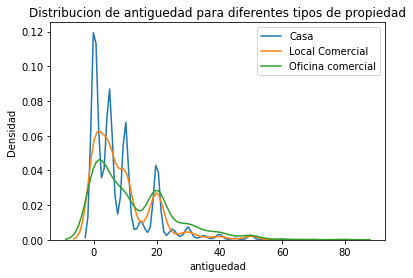

In [5]:
tipos_comunes = ['Casa', 'Local Comercial', 'Oficina comercial']
densidad_plot_comparativo(df, tipos_comunes, 'tipodepropiedad', 'antiguedad')
plt.savefig('./figs/distribucion_antiguedad_1.png')

# Distribucion de precios

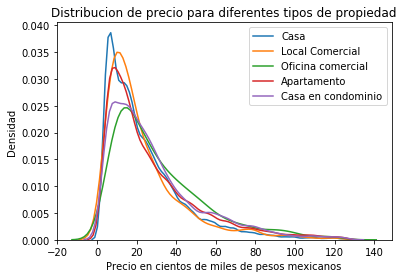

In [6]:
tipos_comunes.append('Apartamento')
tipos_comunes.append('Casa en condominio')
precios = df['precio'].copy()
df['precio'] = df['precio'].transform(lambda x:x/100000)
densidad_plot_comparativo(df, tipos_comunes, 'tipodepropiedad', 'precio')
df['precio'] = precios
plt.xlabel('Precio en cientos de miles de pesos mexicanos')
plt.savefig('./figs/distribucion_precios.png')
plt.show()

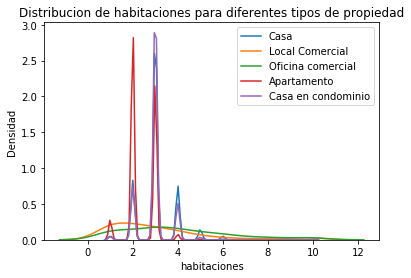

In [7]:
tipos_residenciales = ['Casa', 'Apartamento', 'Casa en condominio', 'Edificio']
densidad_plot_comparativo(df, tipos_comunes, 'tipodepropiedad', 'habitaciones')

### Horrible, hay que sacarlo ###

Text(0.5, 1, 'Relacion habitaciones / banos')

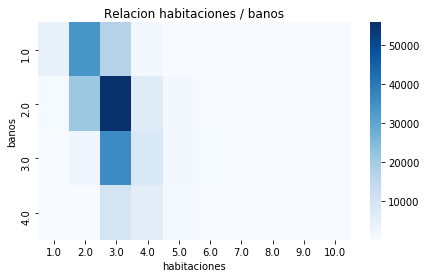

In [8]:
habitaciones_banos = df.groupby(['habitaciones', 'banos']).agg({'id':'count'})
habitaciones_banos.rename(columns = {'id':'cantidad'}, inplace=True)
habitaciones_banos = habitaciones_banos.\
                                        reset_index()\
                                        .pivot(index="habitaciones", columns = "banos", values = "cantidad")

plt.figure(figsize = (7,4))
ax = sns.heatmap(habitaciones_banos.T, cmap="Blues")
ax.set_ylim(4.0, 0)
plt.title('Relacion habitaciones / banos')

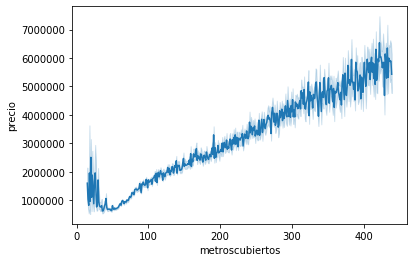

In [9]:
sns.lineplot(x = df['metroscubiertos'], y = df['precio'])

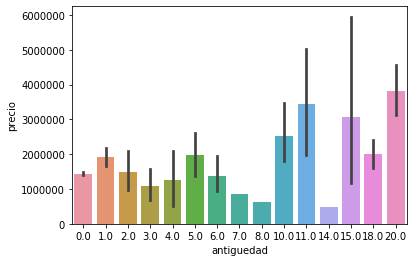

In [10]:
terrenos = df.loc[df['tipodepropiedad'] == 'Terreno',]
terrenos = terrenos.loc[df['antiguedad'] < 21.0,]
sns.barplot(x = terrenos['antiguedad'], y = terrenos['precio'])

In [11]:
df.tipodepropiedad.value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

In [101]:
import math
df2 = df.loc[df['antiguedad'].notnull(),]
df2 = df2.sort_values(by = 'antiguedad')
df2['antiguedad'] = df2['antiguedad'].transform(lambda antiguedad:math.floor(antiguedad/5))
provincias = df2.groupby('provincia').agg({'id':'count'}).sort_values(by='id', ascending = False).head(6).reset_index()

Text(0.5, 15.0, 'Antiguedad')

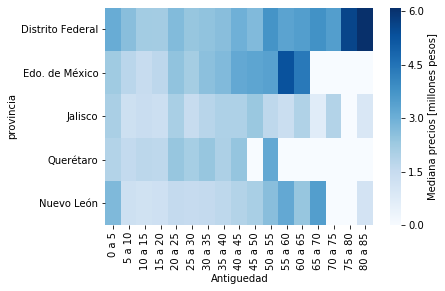

In [126]:
medianas = df2.groupby(['provincia','antiguedad']).agg({'precio':'median'}).reset_index().pivot(index = 'provincia', columns = 'antiguedad', values = 'precio')
data = provincias.merge(medianas,on = 'provincia',how = 'inner').drop('id', axis = 1).set_index('provincia').fillna(0)
ax = sns.heatmap(data.transform(lambda x:x*1e-6),\
                 cmap = 'Blues',\
                 cbar_kws = {'label' : 'Mediana precios [millones pesos]'},\
                 xticklabels = [f'{5*antiguedad} a {5*(1+antiguedad)}' for antiguedad in data.columns])
ax.set_ylim(5.0, 0)
plt.xlabel('Antiguedad')